# Import


In [1]:
#import aerosandbox as asb
#import aerosandbox.numpy as np
#import neuralfoil as nf
# from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np
import math

# Step 1: Take off mass

In [22]:
g = 9.81 

eng_q = 2 
con_cell_num = 6 # количество параллельных ячеек в батарее
cell_U = 4.2 # Напряжение каждой ячейки
prop_D = 22 # Диаметрр пропеллера в дюймах

LD_ratio_cruise = 14 # Отношение подъемной силы к силы лобового сопротивления
prop_efficiency = 0.75 # КПД винта
battery_specific_energy = 216 
payload_mass = 1.5 # Масса полезной нагрузки
flight_time = 90 # Время полета в минутах
flight_time_hr = flight_time / 60 # Время полета в часах
cruise_speed = 90 # Скорость полета в км/ч
cruise_speed_ms = cruise_speed / 3.6 # Скорость полета в км/ч
takeoff_mass_reserve = 1.07 # Коэффициент запаса массы для взлета
battery_mass_reserve = 1.1 # Коэффициент запаса массы аккумулятора
k = 0.3 #
n = 2.3 #
prop_fasteners = 0.015 # коэффициент добавочной массы креплений в СУ
e = 0.78 # Коэффициент Освальда


## Zero approximation of takeoff mass

In [23]:
zero_apr_mass = 5.147 * (payload_mass ** 0.849)
zero_apr_weight = zero_apr_mass * g
print(zero_apr_mass)
print(zero_apr_weight)

7.26199001085213
71.2401220064594


## First approximation of takeoff mass

In [24]:
equipment_mass = 0.46
stat_structure_mass = zero_apr_mass * 0.3
req_power = zero_apr_weight * cruise_speed / LD_ratio_cruise / prop_efficiency
one_eng_power = req_power / eng_q
eng_mass = 0.889 * (one_eng_power ** -0.288) * ((con_cell_num * cell_U) **  0.1588)
prop_mass = k * (prop_D ** n) / 1000
power_mass = eng_mass + prop_mass + prop_fasteners
battery_mass = (req_power * flight_time_hr / battery_specific_energy) * battery_mass_reserve
m0_new1 = (payload_mass + stat_structure_mass + equipment_mass + power_mass + battery_mass) * takeoff_mass_reserve

print("First approximation takeoff mass (kg):", m0_new1)
print("Power required (W):", req_power)
print("Motor mass (kg):", eng_mass)
print("Propeller mass (kg):", prop_mass)
print("Power plant mass (kg):", power_mass)
print("Battery mass (kg):", battery_mass)
print("Structure mass (kg):", stat_structure_mass)

mass_diff = (zero_apr_mass - m0_new1) / (zero_apr_mass * 100)
print("Mass difference (%):", mass_diff)

First approximation takeoff mass (kg): 10.133759849953663
Power required (W): 610.6296171982234
Motor mass (kg): 0.28565167860570095
Propeller mass (kg): 0.36702311818421196
Power plant mass (kg): 0.6676747967899129
Battery mass (kg): 4.664531798041984
Structure mass (kg): 2.1785970032556388
Mass difference (%): -0.003954521880104536


## Second approximation of takeoff mass

In [25]:
zero_apr_mass = m0_new1
req_power = zero_apr_weight * cruise_speed / LD_ratio_cruise / prop_efficiency
one_eng_power = req_power / eng_q
eng_mass = 0.889 * (one_eng_power ** -0.288) * ((con_cell_num * cell_U) **  0.1588)
prop_mass = k * (prop_D ** n) / 1000
power_mass = eng_mass + prop_mass + prop_fasteners
battery_mass = (req_power * flight_time_hr / battery_specific_energy) * battery_mass_reserve
stat_structure_mass = zero_apr_mass * 0.3
m0_new2 = (payload_mass + stat_structure_mass + equipment_mass + power_mass + battery_mass) * takeoff_mass_reserve

print("\nSecond approximation takeoff mass (kg):", m0_new2)
print("Power required (W):", req_power)
print("Motor mass (kg):", eng_mass)
print("Propeller mass (kg):", prop_mass)
print("Power plant mass (kg):", power_mass)
print("Battery mass (kg):", battery_mass)
print("Structure mass (kg):", stat_structure_mass)

mass_diff = (zero_apr_mass - m0_new1) / (zero_apr_mass * 100)
print("Mass difference (%):", mass_diff)


Second approximation takeoff mass (kg): 11.055597968305257
Power required (W): 610.6296171982234
Motor mass (kg): 0.28565167860570095
Propeller mass (kg): 0.36702311818421196
Power plant mass (kg): 0.6676747967899129
Battery mass (kg): 4.664531798041984
Structure mass (kg): 3.0401279549860987
Mass difference (%): 0.0


# Step 2: Определение параметров завязки
## Input value 1

In [ ]:
stall_speed = 55 # скорость сваливания (км/ч)
air_density_sea_level = 1.225 # плотность воздуха на взлете
max_lift_coefficient = 1.4 # коэффициент подъемной силы крыла максимальный (по статистике)
min_lift_coefficient = -0.8 # коэффициент подъемной силы крыла минимальный (по поляре профиля)
CL = 5.25 # производная CL (по поляре профиле)
WP = 0.1 # энерговооруженность (по прототипу)



## Calculation 1

In [ ]:
stall_speed_ms = stall_speed / 3.6 # stall speed (m/s)
dynamic_pressuare = 0.5 * air_density_sea_level * stall_speed_ms ** 2 # Dynamic pressuare on stall 
wing_loading = max_lift_coefficient * dynamic_pressuare # Wing loading on stall

print("Dynamic pressuare on stall:", dynamic_pressuare)
print("Wing loading on stall:", wing_loading)

Dynamic pressuare on stall: 142.9639274691358
Wing loading on stall: 200.1494984567901


## Calculation 2

In [8]:
take_off_weight = m0_new2 * g
S_wing = wing_loading / take_off_weight

print("Wing area (S):", S_wing)

Wing area (S): 1.8454541572116245


## Сalculation of battery parameters

In [9]:
series_cells_n = 6
parallel_cells_n = 4 
battery_weight = battery_mass * g
cell_U_min = 3
cell_U_max = 4.2
cell_capacity_nom_A = 4.2 
cell_capacity_nom_W = 15.5
max_current_cell = 45
cell_mass = 0.07
battery_mass_coef = 1.12

screws_n = 2
blades_n = 2
Kp = 0.0995

cell_total = series_cells_n * parallel_cells_n
pack_cell_U_min = series_cells_n * cell_U_min
pack_cell_U_max = series_cells_n * cell_U_max
pack_cell_U = series_cells_n * cell_U
pack_cell_capacity_nom_A = parallel_cells_n * cell_capacity_nom_A
pack_cell_capacity_nom_W = parallel_cells_n * cell_capacity_nom_W
pack_max_current_cell = parallel_cells_n * max_current_cell
pack_cell_mass = cell_total * cell_mass * battery_mass_coef
battery_pack_q = 1
total_battery_mass = pack_cell_mass * battery_pack_q
total_battery_capacity = battery_pack_q * pack_cell_capacity_nom_A

max_cell_q = battery_weight / battery_mass_coef / cell_mass

print("Емкость АБ:", pack_cell_capacity_nom_A, "А*ч")
print("Масса АБ:", total_battery_mass)
print("Емкость всех АБ при параллельном подключении:", total_battery_capacity, "А*ч")

Емкость АБ: 16.8 А*ч
Масса АБ: 1.8816000000000004
Емкость всех АБ при параллельном подключении: 16.8 А*ч


## Input value 3

In [10]:
Re_cruise = 511979
SwetS = 2 # Согласно таблице из источников
fric_coef = 0.74/(Re_cruise**0.2)
AR = 8 # Удлинение крыла
air_density_cruise = 1.1117
dynamic_viscosity_cruise = 0.00001787
prop_efficiency_cruise = 0.75
battery_depth = 0.3

## Calculation 3

In [11]:
zero_lift_drag_cruise = SwetS * fric_coef
induced_drag_factor_K = 0.3183 / AR / 0.78
wing_loading = wing_loading * 1
dynamic_pressuare_cruise = 0.5 * air_density_cruise * (cruise_speed_ms ** 2)
# aerodynamic_quality = 1 / ((dynamic_pressuare_cruise*Cd0 / wing_loading) * (wing_loading * K / dynamic_pressuare_cruise))
CL_opt = np.sqrt(zero_lift_drag_cruise / induced_drag_factor_K)
CD_opt = zero_lift_drag_cruise + induced_drag_factor_K * CL_opt**2
aerodynamic_quality = CL_opt / CD_opt

eng_efficiency = prop_efficiency * 0.95
MbatM0 = total_battery_mass / m0_new2
payload_weight = payload_mass * g

print(zero_lift_drag_cruise)
print("Cruise wing loading:", wing_loading, "H/m2")
print("Cruise dynamic pressuare:", dynamic_pressuare_cruise, "H/m2")
print("Aerodynamic quality L/D:", aerodynamic_quality)
print("Отношение массы батареи к массе всего БЛА в течении заданного времени:", MbatM0)

0.1067606688226137
Cruise wing loading: 200.1494984567901 H/m2
Cruise dynamic pressuare: 347.40625 H/m2
Aerodynamic quality L/D: 6.77545299895771
Отношение массы батареи к массе всего БЛА в течении заданного времени: 0.17019432195293874


## Input value 4

In [12]:
taper_ratio = 0.57
# fuselage_lenght = 
# fuselage_width =

## Calculation 4

In [13]:
wingspan = np.sqrt(AR * S_wing)
root_chord_lenght = (2 * S_wing) / (wingspan * (1 + taper_ratio))
tip_chord_lenght = taper_ratio * root_chord_lenght
# tip_chord_lenght = wingspan * root_chord_lenght
MAC = (2/3) * root_chord_lenght * (1 + taper_ratio + taper_ratio ** 2) / (1 + taper_ratio)

print(f"Wingspan: {wingspan:.3f} m")
print(f"Lenght of middle aerodynamic chord: {MAC:.3f} m")

Wingspan: 3.842 m
Lenght of middle aerodynamic chord: 0.492 m


# Step 3: Constant analysis

## VTOL UAV Constraint Diagram

### Fixed-Wing Mode

#### Stall speed
Wing loading for stall speed:

$$
\frac{W}{S} = \frac{1}{2} \rho V_s^2 C_{L_{\text{max}}}
$$

**Where:**
- $W/S$ = Wing loading (N/m²)
- $V_s$ = Stall speed (m/s)
- $C_{L_{\text{max}}}$ = Maximum lift coefficient
- $\rho$ = Air density (kg/m³)

#### Maximum Speed Constraint
Power loading for maximum speed:

$$
\frac{P}{W} = \frac{1}{\eta_p} \left( \frac{1}{2} \rho V_{\text{max}}^3 \frac{C_{D_0}}{W/S} + \frac{2K}{\rho V_{\text{max}}} \frac{W}{S} \right)
$$

**Where:**
- $\eta_p$ = Propeller efficiency
- $V_{\text{max}}$ = Maximum speed (m/s)
- $C_{D_0}$ = Zero-lift drag coefficient
mb rate (Tessure (Pa)
- $\theta$ = Tilt angle (degrees)
- $V$ = Transition speed (m/s)
- $k_i$ = Induced power correction factor

#### Rate of Climb Constraint
Power loading for climb rate:

$$
\frac{P}{W} = \frac{1}{\eta_p} \left( \frac{V_c}{V} + \frac{qC_{D_0}}{W/S} + \frac{K}{q} \frac{W}{S} \right)V
$$

**Where:**
- $V_c$ = Climb rate (m/s)
- $V$ = Flight speed (m/s)
- $q = \frac{1}{2}\rho V^2$ = Dynamic pressure (Pa)


The maximum rate of climb speed for the given wing loading:
$$
V_{\text{climb}} = \sqrt{\frac{2 \cdot (W/S)}{\rho}} \cdot \left( \frac{K}{C_{D_0}} \right)^{1/4}
$$

**Where:**
- $V_{\text{climb}}$ = Best climb speed (m/s)
- $W/S$ = Wing loading (N/m²)
- $\rho$ = Air density (kg/m³)
- $K$ = Induced drag factor
- $C_{D_0}$ = Zero-lift drag coefficient

#### Turn Constraint
Thrust-to-weight ratio for turn:

$$
\frac{T}{W} = q \left( \frac{C_{D_0}}{W/S} + \frac{K n^2}{q^2} \frac{W}{S} \right)
$$

Power loading for turn:

$$
\frac{P}{W} = \frac{1}{\eta_p} \left( \frac{T}{W} \cdot V \right) = \frac{1}{\eta_p} \left( q V \frac{C_{D_0}}{W/S} + \frac{K n^2 V}{q} \frac{W}{S} \right)
$$

**Where:**
- $T/W$ = Thrust-to-weight ratio
- $n$ = Load factor
- $q = \frac{1}{2} \rho V^2$ = Dynamic pressure (Pa)

#### Transition Mode Constraint

Power loading during transition:

$$
\frac{P}{W} = \frac{k_i}{\sin(\theta_{tilt})} \sqrt{\frac{-V_{inf}^2}{2} + \sqrt{\left(\frac{V_{inf}^2}{2}\right)^2 + \left(\frac{(DL)}{2\rho\sin(\theta_{tilt})}\right)^2}} + \frac{\rho V_{Tip}^3}{(DL)} \left(\frac{\sigma C_D}{8} (1 + 4.6\mu^2)\right) + \left(0.5\rho_0 V_{inf}^3 C_{D_0} \frac{1}{(W/S)} + \frac{2K}{\rho V_{inf}} (W/S)\right)
$$

**Where:**
- $q$ = Dynamic pressure (Pa)
- $\theta$ = Tilt angle (degrees)
- $V$ = Transition speed (m/s)
- $k_i$ = Induced power correction factor

533.7319958847736


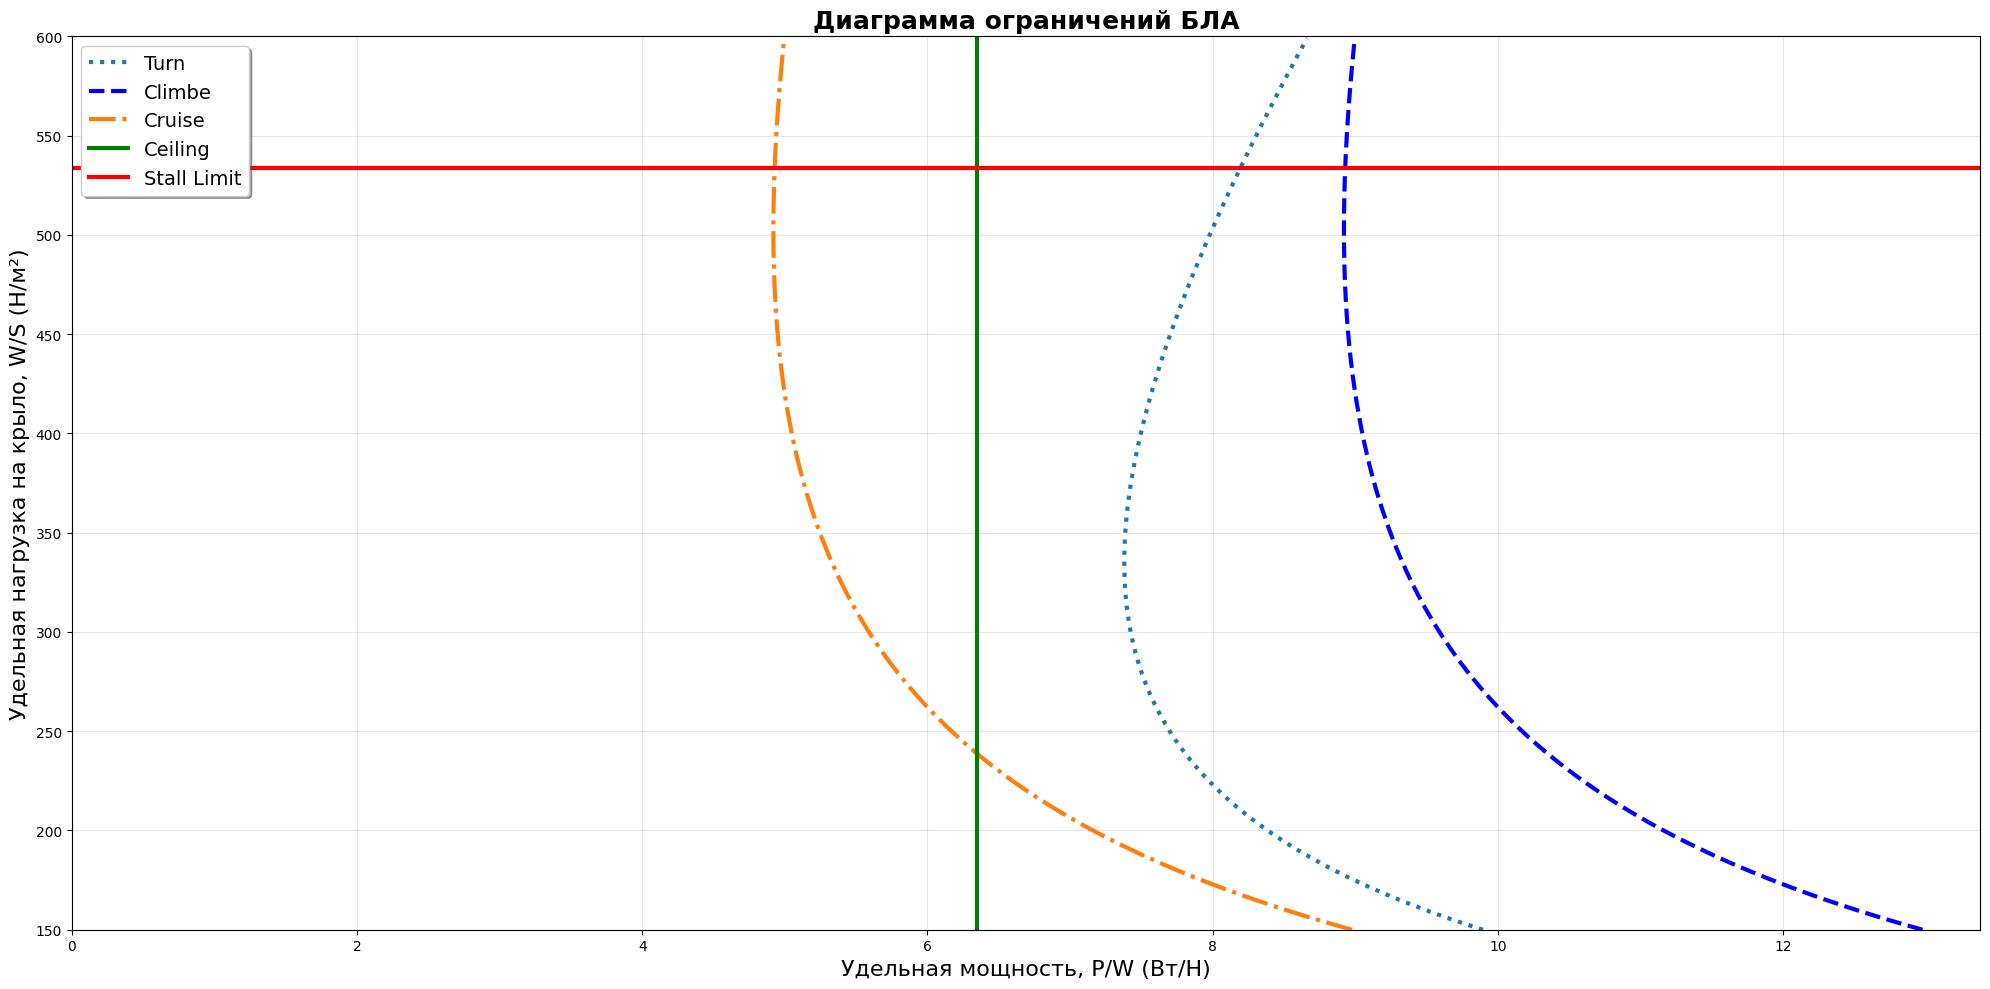

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Take-off weight base on mass from second approximation
weight_takeoff = m0_new2 * g

# Speed on transition
Vinf = stall_speed_ms
Vy_hover = 0.0
Vy_climb = 3.0
Vy_ceiling = 0.5

# Prop characteristics
Vtip = 80  # м/с
solidity = 0.1
Cd_blade = 0.02
induced_power_factor_hover = 1.15
induced_power_factor_climb = 1.15

# Angels
teta_tilt_90 = np.pi / 2
alpha_rotor_trans = 0
V_tip_transition_helical = np.sqrt(Vtip**2 + Vinf**2)
mu = Vinf * np.cos(alpha_rotor_trans) / V_tip_transition_helical

# Wing aerodynamic
wing_loading_optimum_airborne = 300  # Н/м²

climbe_rate = 3 # m/s
ceiling_rate_of_climb = 0.5 # m/s

# Wing loading on stall
wing_loading_stall = max_lift_coefficient*(air_density_sea_level*stall_speed_ms**2)/prop_efficiency
print(wing_loading_stall)

# Range of applyable wing loading in N/m^2
wing_loading_range = np.arange(150, 600, 1, dtype=float)

# Initialize arrays for storing results as floats
power_loading_turn_P_W = np.zeros_like(wing_loading_range, dtype=float)
power_loading_cruise_P_W = np.zeros_like(wing_loading_range, dtype=float)
power_loading_climb_P_W = np.zeros_like(wing_loading_range, dtype=float)
power_loading_ceiling_P_W = np.zeros_like(wing_loading_range, dtype=float)

q = 0.5 * air_density_cruise * cruise_speed_ms**2
n_load = 1.5 # Overload on wing

# Horizontal mode calculation
# Power loading on cruise speed and altitude 
def pw_cruise(wl): 
    return (cruise_speed_ms / prop_efficiency) * (q * zero_lift_drag_cruise / wl + induced_drag_factor_K * wl / q)

# Power loading on velcoity turn
def pw_turn(wl): 
    return (cruise_speed_ms / prop_efficiency) * (q * zero_lift_drag_cruise / wl + induced_drag_factor_K * n_load**2 * wl / q)

# Power loading on climb
def pw_climb(wl): 
    return (3.0 / prop_efficiency) + (cruise_speed_ms / prop_efficiency) * (q * zero_lift_drag_cruise / wl + induced_drag_factor_K * wl / q)

# Power loading on ceiling
def pw_ceiling(wl): 
    return (0.5 / prop_efficiency) + (cruise_speed_ms / prop_efficiency) * 4 * np.sqrt(induced_drag_factor_K * zero_lift_drag_cruise / 3)

# Inserting values into arrays
for i, wing_loading_dif in enumerate(wing_loading_range):
    power_loading_cruise_P_W[i] = pw_cruise(wing_loading_dif)
    power_loading_turn_P_W[i] = pw_turn(wing_loading_dif)
    power_loading_climb_P_W[i] = pw_climb(wing_loading_dif)
    power_loading_ceiling_P_W[i] = pw_ceiling(wing_loading_dif)

# Vertical mode calculation
# Power loading on hover
def pw_hover(disc_loading):
    A = weight_takeoff / disc_loading
    P_ind = induced_power_factor_hover * np.sqrt(weight_takeoff) / np.sqrt(2 * air_density_sea_level * A)
    P_prof = air_density_sea_level * A * Vtip**3 * solidity * Cd_blade / (8 * weight_takeoff)
    return P_ind + P_prof

# Power loading on climb
def pw_vertical_climb(disc_loading, Vy):
    term1 = Vy * (1 - induced_power_factor_climb / 2)
    term2 = (induced_power_factor_climb / 2) * np.sqrt(Vy**2 + 2 * disc_loading / air_density_sea_level)
    term3 = air_density_sea_level * Vtip**3 * solidity * Cd_blade / (8 * disc_loading)
    return term1 + term2 + term3

#Power loading on transition
def pw_transition(disc_loading):
    term1 = 1.2 / np.sin(teta_tilt_90) * np.sqrt(-Vinf**2 / 2 + np.sqrt((Vinf**2 / 2)**2 + (disc_loading / (2 * air_density_sea_level * np.sin(teta_tilt_90)))**2))
    term2 = (air_density_sea_level * V_tip_transition_helical**3 / disc_loading * (solidity * Cd_blade / 8 * (1 + 4.6 * mu**2)))
    term3 = (0.5 * air_density_sea_level * Vinf**3 * zero_lift_drag_cruise / wing_loading_optimum_airborne + 2 * induced_drag_factor_K * wing_loading_optimum_airborne / (air_density_sea_level * Vinf))
    return term1 + term2 + term3


disc_loading_range = np.linspace(20, 200, 200)  # Н/м²

# Inserting values for vertical mode into array
pw_hover_arr = np.array([pw_hover(dl) for dl in disc_loading_range])
pw_vclimb_arr = np.array([pw_vertical_climb(dl, Vy_climb) for dl in disc_loading_range])
pw_vceiling_arr = np.array([pw_vertical_climb(dl, Vy_ceiling) for dl in disc_loading_range])
pw_trans_arr = np.array([pw_transition(dl) for dl in disc_loading_range])

# Creating of diagram
fig, ax1 = plt.subplots(figsize=(20, 10))

# Левая ось: Wing Loading (W/S) vs P/W
ax1.plot(power_loading_turn_P_W, wing_loading_range, ':', linewidth=3, label='Turn')
ax1.plot(power_loading_climb_P_W, wing_loading_range, '--', color='blue', linewidth=3, label='Climbe')
ax1.plot(power_loading_cruise_P_W, wing_loading_range, '-.', linewidth=3, label='Cruise')
ax1.plot(power_loading_ceiling_P_W, wing_loading_range, '-', color='green', linewidth=3, label='Ceiling')

ax1.axhline(y=wing_loading_stall, color='red', linewidth=3, label='Stall Limit')

ax1.set_xlabel('Удельная мощность, P/W (Вт/Н)', fontsize=16, fontweight='bold')
ax1.set_ylabel('Удельная нагрузка на крыло, W/S (Н/м²)', fontsize=16, color='navy')
ax1.set_title('Диаграмма ограничений БЛА', fontsize=18, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.set_xlim(left=0)  # Убираем отрицательные значения
# ax1.set_ylim(150, 600)

# ax1.legend(fontsize=14, loc='upper left', frameon=True, fancybox=True, shadow=True)

# plt.tight_layout()
# plt.show()

ax2 = ax1.twinx()

ax2.plot(pw_hover_arr, disc_loading_range, '--', color='magenta', lw=3, label='Висение (Hover)')
ax2.plot(pw_vclimb_arr, disc_loading_range, '-.', color='orange', lw=3, label='Вертикальный набор')
ax2.plot(pw_vceiling_arr, disc_loading_range, ':', color='green', lw=3, label='Потолок VTOL')
ax2.plot(pw_trans_arr, disc_loading_range, '-', color='brown', lw=4, label='Переход (Transition)')

# Геометрическое ограничение
ax2.axhline(y=disc_loading_max_diameter, color='black', linestyle=':', lw=3, label='Макс. диаметр пропеллера')

ax2.set_ylabel('Удельная нагрузка на диск W/A (Н/м²)', fontsize=16, color='magenta')
ax2.tick_params(axis='y', labelcolor='magenta')

# === ЛЕГЕНДА ===
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, 
           loc='upper left', bbox_to_anchor=(0.02, 0.98), fontsize=13, framealpha=0.95)

# === АННОТАЦИИ ===
ax1.text(0.02, 0.98, f"Масса: {m0_new2:.1f} кг\nСкорость: {cruise_speed} км/ч\nВремя: {flight_time} мин",
         transform=ax1.transAxes, fontsize=12, verticalalignment='top',
         bbox=dict(boxstyle="round,pad=0.4", facecolor="white", edgecolor="gray"))

plt.title('Диаграмма ограничений гибридного БЛА (VTOL + Fixed-Wing)', 
          fontsize=18, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()